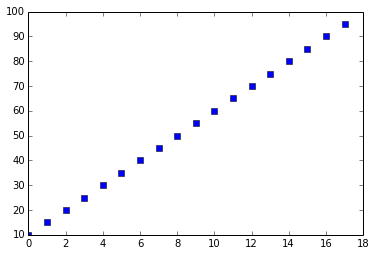

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

#最简单的数学绘图
plt.plot(range(10,100,5),'bs')# b代表blue,s代表squre。还有rgk,-^_o可用。

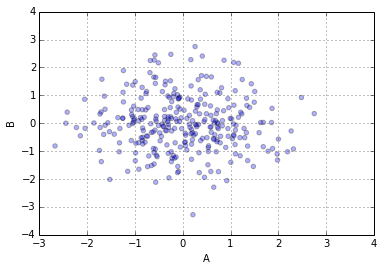

In [12]:
import numpy as np
import pandas as pd

# 一下三行代码测试生成随机散列图，来检查数据的重复状况，颜色越浓说明数据重复越高。
dates = pd.date_range('20150101', periods= 300)#生成随机Series
df1 = pd.DataFrame(np.random.randn(300,4), index=dates, columns=list('ABCD'))#生成随机DataFrame
df1.plot(kind='scatter',x='A', y='B', alpha=0.3)#生成散列图，查看数据重复状况，alpha设定透明度。

In [ ]:
#面向对象的视图化思维
# from matplotlib.figure import Figure
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# fig    = Figure()
# canvas = FigureCanvas(fig)
# ax     = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# line,  = ax.plot([0,1], [0,1])
# ax.set_title("a straight line (OO)")
# ax.set_xlabel("x value")
# ax.set_ylabel("y value")
# #canvas.print_figure('/Users/chengang/Desktop/demo.pdf')